# 📰 Fake News Detection Project  

## 💡 Business Context  
In today’s digital world, information spreads instantly through social media, online platforms, and digital news outlets. While this has made access to information easier, it has also given rise to the rapid spread of **fake news**. Misinformation can mislead the public, damage reputations, and even cause serious social and economic harm.  

The challenge of fake news is no longer limited to individuals reading misleading articles. It now impacts entire societies and industries:  

- **Political Manipulation**: Fake news can influence elections and undermine democratic processes by spreading false claims.  
- **Financial Impact**: False reports about companies, markets, or products can cause massive financial losses and volatility.  
- **Public Safety Risks**: During health crises like COVID-19, fake news about cures, vaccines, or safety measures put millions of lives at risk.  
- **Social Trust**: Continuous exposure to misinformation erodes public trust in media and reliable institutions.  

---

## 📌 Why This Project Matters  
This project focuses on creating a **system to automatically detect fake news**. Such a system has huge value for:  

- **Media Organizations** → Supporting fact-checking teams to quickly identify false stories.  
- **Social Media Platforms** → Filtering harmful or misleading content before it spreads widely.  
- **Businesses & Governments** → Protecting brands, institutions, and public trust from the damage caused by misinformation.  
- **Readers & Citizens** → Helping individuals distinguish between credible news and misinformation so they can make informed decisions.  

---

## 🎯 Business Goal  
The ultimate goal is to provide a solution that:  
1. **Reduces the spread of misinformation** by detecting fake news early.  
2. **Protects trust and credibility** in legitimate journalism and institutions.  
3. **Prevents financial and social harm** caused by false stories.  
4. **Empowers readers and platforms** to make data-driven decisions about what information to share.  

---

## 🌍 Real-World Impact  
A successful fake news detection system has the potential to:  
- Strengthen democracy by reducing the influence of fake stories in politics.  
- Protect markets and businesses from the consequences of false financial news.  
- Safeguard public health by limiting the spread of dangerous misinformation.  
- Restore confidence in media by ensuring readers are exposed to more reliable information.  

In short, this project addresses one of the most critical challenges of the digital era—**separating truth from lies in the news we consume daily**.  

---


In [2]:
from google.colab import files

uploaded = files.upload()

Saving True.csv to True.csv
Saving Fake.csv to Fake.csv


In [3]:
import pandas as pd

true_df = pd.read_csv("True.csv")
fake_df = pd.read_csv("Fake.csv")

print("True dataset shape:", true_df.shape)
print("Fake dataset shape:", fake_df.shape)


True dataset shape: (21417, 4)
Fake dataset shape: (23481, 4)


In [5]:
print("True News Sample:")
true_df.head()



True News Sample:


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
print("Fake News Sample:")
fake_df.head()

Fake News Sample:


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [16]:
print(true_df.info())
print(fake_df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 21211 entries, 0 to 21416
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        21211 non-null  object
 1   text         21211 non-null  object
 2   subject      21211 non-null  object
 3   date         21211 non-null  object
 4   label        21211 non-null  int64 
 5   text_length  21211 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 23478 entries, 0 to 23480
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        23478 non-null  object
 1   text         23478 non-null  object
 2   subject      23478 non-null  object
 3   date         23478 non-null  object
 4   label        23478 non-null  int64 
 5   text_length  23478 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.3+ MB
None


## Check for missing values

In [17]:
print("Missing values in True dataset:\n", true_df.isnull().sum())
print("\nMissing values in Fake dataset:\n", fake_df.isnull().sum())


Missing values in True dataset:
 title          0
text           0
subject        0
date           0
label          0
text_length    0
dtype: int64

Missing values in Fake dataset:
 title          0
text           0
subject        0
date           0
label          0
text_length    0
dtype: int64


## Checking duplicates

In [18]:
print("True duplicates:", true_df.duplicated().sum())
print("Fake duplicates:", fake_df.duplicated().sum())


True duplicates: 0
Fake duplicates: 0


In [15]:
# Remove duplicates
true_df = true_df.drop_duplicates()
fake_df = fake_df.drop_duplicates()

print("True duplicates after cleaning:", true_df.duplicated().sum())
print("Fake duplicates after cleaning:", fake_df.duplicated().sum())


True duplicates after cleaning: 0
Fake duplicates after cleaning: 0


In [19]:
print("True news subjects:\n", true_df['subject'].value_counts())
print("\nFake news subjects:\n", fake_df['subject'].value_counts())


True news subjects:
 subject
politicsNews    11220
worldnews        9991
Name: count, dtype: int64

Fake news subjects:
 subject
News               9050
politics           6838
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64


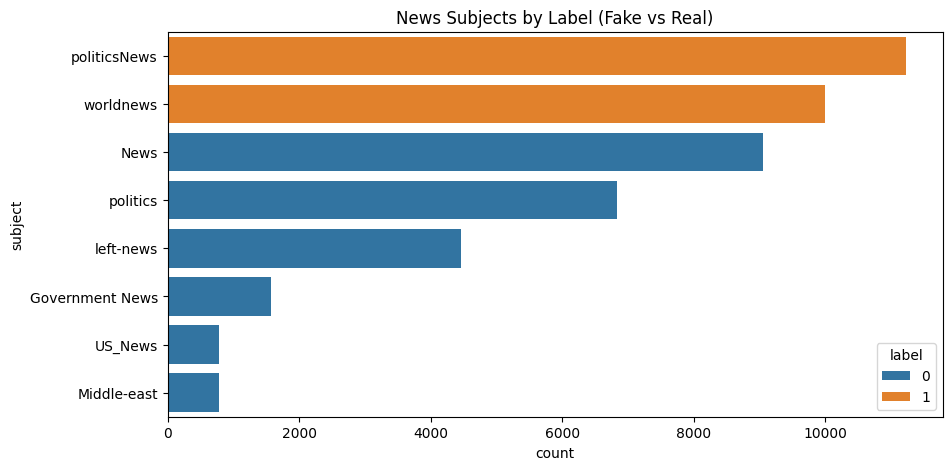

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='subject', hue='label', order=df['subject'].value_counts().index)
plt.title("News Subjects by Label (Fake vs Real)")
plt.show()


In [20]:
true_df['label'] = 1
fake_df['label'] = 0

df = pd.concat([true_df, fake_df], axis=0).reset_index(drop=True)

print("Combined dataset shape:", df.shape)
df.head()


Combined dataset shape: (44689, 6)


,title,text,subject,date,label,text_length
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,749
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,624
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,457
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,376
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,852


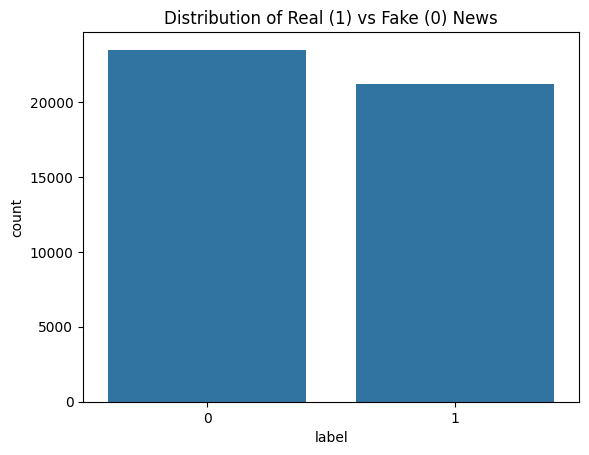

label
0    23478
1    21211
Name: count, dtype: int64


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='label')
plt.title("Distribution of Real (1) vs Fake (0) News")
plt.show()

print(df['label'].value_counts())


In [27]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download resources (run only once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Lowercase
    text = text.lower()

    # Remove special characters, numbers, punctuation
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Tokenize
    words = nltk.word_tokenize(text)

    # Remove stopwords + Lemmatization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    return " ".join(words)

# Apply to dataset
df['clean_text'] = df['text'].apply(clean_text)

df[['text', 'clean_text']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,clean_text
0,WASHINGTON (Reuters) - The head of a conservat...,washington reuters head conservative republica...
1,WASHINGTON (Reuters) - Transgender people will...,washington reuters transgender people allowed ...
2,WASHINGTON (Reuters) - The special counsel inv...,washington reuters special counsel investigati...
3,WASHINGTON (Reuters) - Trump campaign adviser ...,washington reuters trump campaign adviser geor...
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,seattle washington reuters president donald tr...


## Train-Test Split

In [37]:
from sklearn.model_selection import train_test_split

X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## Logistic Regression with GridSearchCV

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Pipeline
pipeline_lr = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=1000))
])

# GridSearch parameters
param_grid = {
    'tfidf__max_features': [5000, 10000, 15000],
    'clf__C': [0.1, 1, 10]
}

grid_lr = GridSearchCV(pipeline_lr, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_lr.fit(X_train, y_train)

print("Best parameters:", grid_lr.best_params_)
print("Best F1-score:", grid_lr.best_score_)

# Evaluate on test set
y_pred_lr = grid_lr.predict(X_test)
print("Test set performance:\n", classification_report(y_test, y_pred_lr))


Best parameters: {'clf__C': 10, 'tfidf__max_features': 10000}
Best F1-score: 0.9909705956180115
Test set performance:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4242

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938



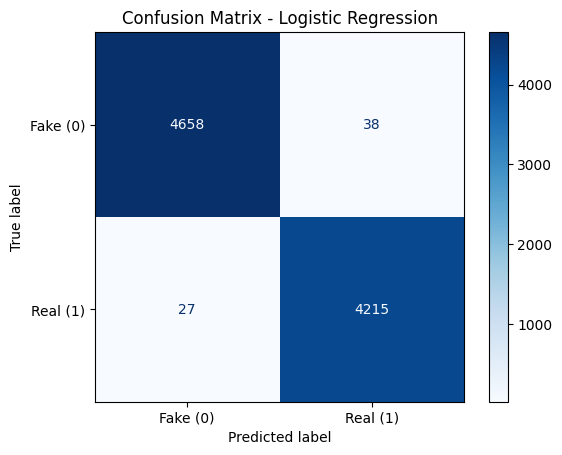

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_lr, labels=[0, 1])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fake (0)", "Real (1)"])
disp.plot(cmap=plt.cm.Blues, values_format='d')

plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [45]:
# Example: a new news article
new_article = """
Messi will play at alahly
"""

# Make prediction using Logistic Regression GridSearch model
pred_label = grid_lr.predict([new_article])[0]
pred_proba = grid_lr.predict_proba([new_article])[0] if hasattr(grid_lr, "predict_proba") else None

label_name = "Real" if pred_label == 1 else "Fake"

print("Prediction:", label_name)
if pred_proba is not None:
    print("Probability distribution:", pred_proba)


Prediction: Fake
Probability distribution: [0.96377879 0.03622121]


# Naive Bayes


In [39]:
from sklearn.naive_bayes import MultinomialNB

pipeline_nb = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000)),
    ('clf', MultinomialNB())
])

pipeline_nb.fit(X_train, y_train)
y_pred_nb = pipeline_nb.predict(X_test)
print("Naive Bayes performance:\n", classification_report(y_test, y_pred_nb))


Naive Bayes performance:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      4696
           1       0.93      0.93      0.93      4242

    accuracy                           0.93      8938
   macro avg       0.93      0.93      0.93      8938
weighted avg       0.93      0.93      0.93      8938



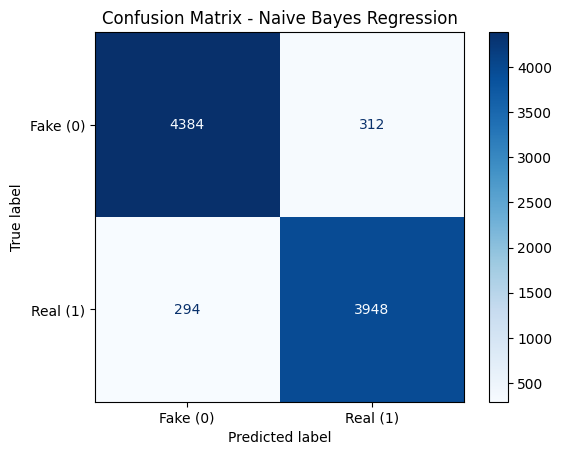

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_nb, labels=[0, 1])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fake (0)", "Real (1)"])
disp.plot(cmap=plt.cm.Blues, values_format='d')

plt.title("Confusion Matrix - Naive Bayes Regression")
plt.show()


# SVM (linearSVC)


In [40]:
from sklearn.svm import LinearSVC

pipeline_svm = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000)),
    ('clf', LinearSVC())
])

pipeline_svm.fit(X_train, y_train)
y_pred_svm = pipeline_svm.predict(X_test)
print("SVM performance:\n", classification_report(y_test, y_pred_svm))


SVM performance:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4696
           1       1.00      0.99      0.99      4242

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938



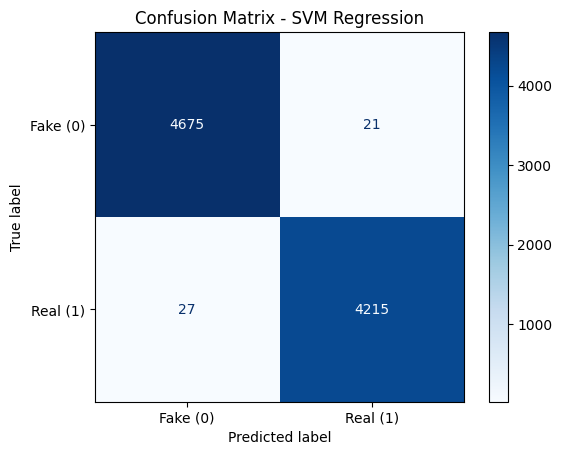

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_svm, labels=[0, 1])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fake (0)", "Real (1)"])
disp.plot(cmap=plt.cm.Blues, values_format='d')

plt.title("Confusion Matrix - SVM Regression")
plt.show()
